In [9]:
from fastai.vision.all import *
from fastai.text.all import *
import fastbook
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
from fastbook import plot_function



fastbook.setup_book()


path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
(path/'train').ls()

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

im3_path = threes[1]
im3 = Image.open(im3_path)

In [10]:
# Tensors and arrays are the same
print(array(im3)[4:10,4:10])
print(tensor(im3)[4:10,4:10])
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
display(df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys'))

[[  0   0   0   0   0   0]
 [  0   0   0   0   0  29]
 [  0   0   0  48 166 224]
 [  0  93 244 249 253 187]
 [  0 107 253 253 230  48]
 [  0   3  20  20  15   0]]
tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


6131 6265
torch.Size([28, 28])


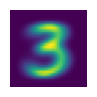

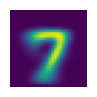

In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
print(len(three_tensors),len(seven_tensors))
print(seven_tensors[0].shape)

# Normalizes pixel values from the range [0, 255] to [0.0, 1.0]
# after stacking the sevens, and threes ontop of each other.
# [6131, 28, 28] and [6265, 28, 28]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

# ideal 3
mean3 = stacked_threes.mean(0)
show_image(mean3);

# ideal 7
mean7 = stacked_sevens.mean(0)
show_image(mean7);

tensor(0.1114) tensor(0.2021)
tensor(0.1586) tensor(0.3021)
tensor(0.1586)
tensor(0.3021)


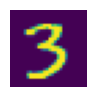

In [12]:
a_3 = stacked_threes[1]
show_image(a_3)

# L1 Norm (mean absolute value)
dist_3_abs = (a_3 - mean3).abs().mean()
dist_7_abs = (a_3 - mean7).abs().mean()
# MSE Mean square error
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()

# our 3 is closer to the ideal 3 using both equations
# than the 7 is
print(dist_3_abs,dist_3_sqr)
print(dist_7_abs,dist_7_sqr)

# L1 Norm (mean absolute value)
print(F.l1_loss(a_3.float(),mean7))
# MSE Mean square error
print(F.mse_loss(a_3,mean7).sqrt())

In [13]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)
print(arr)  # numpy
print(tns)  # pytorch

# all rows, column 3
print(tns[:,2])
# 1st row, column 3
print(tns[:1,2])
# 2nd row, 2-3 columns
print(tns[1,1:3])

# add 1 to all
print(tns+1)
tns.type()

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([3, 6])
tensor([3])
tensor([5, 6])
tensor([[2, 3, 4],
        [5, 6, 7]])


'torch.LongTensor'

In [14]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

# L1 method
def mnist_distance(a,b):
    return (a-b).abs().mean((-1,-2))

mnist_distance(a_3, mean3)
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

def is_3(x):
    return mnist_distance(x,mean3) < mnist_distance(x,mean7)

is_3(a_3), is_3(a_3).float()
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

tensor(9., grad_fn=<PowBackward0>)


tensor([ 6.,  8., 20.])

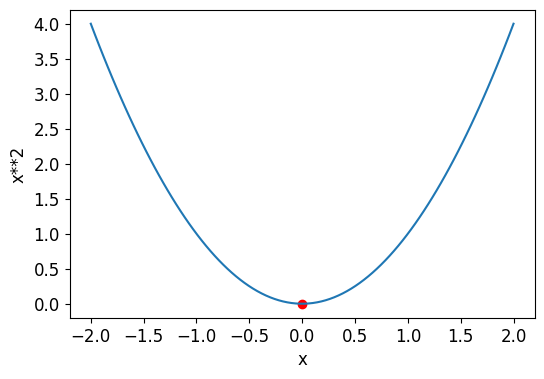

In [15]:
def f(x):
    return x**2

plot_function(f, 'x', 'x**2')
plt.scatter(0, f(0), color='red')
xt = tensor(3.).requires_grad_()

yt = f(xt)
print(yt)

# calculate gradient for us
yt.backward()
xt.grad

xt = tensor([3.,4.,10.]).requires_grad_()
xt

def f(x):
    return (x**2).sum()

yt = f(xt)
yt
yt.backward()
xt.grad

In [16]:
gv('''
digraph {
    rankdir=LR
    init -> predict -> loss -> gradient -> step -> stop
    step -> predict [label=repeat]
}
''')


NameError: name 'gv' is not defined

loss tensor(11061.8408, grad_fn=<MeanBackward0>)


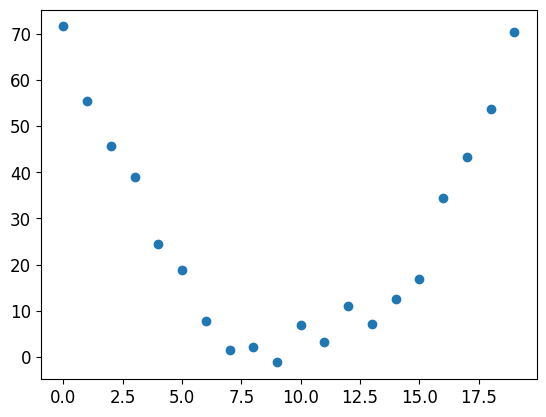

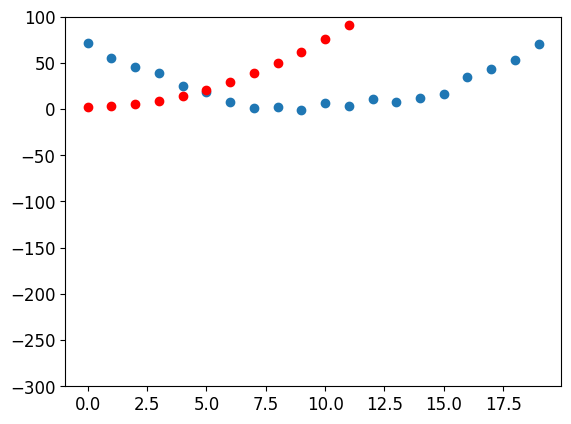

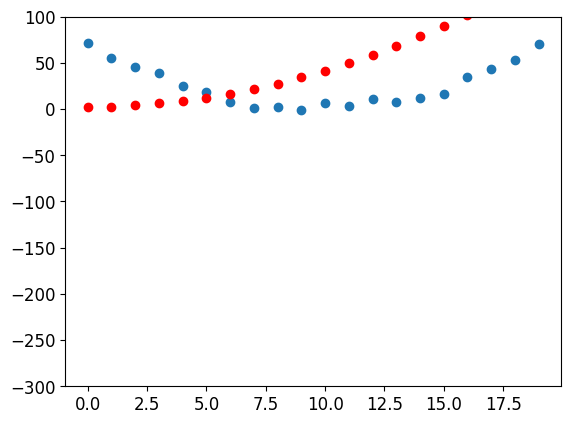

In [ ]:
time = torch.arange(0,20).float()
time
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

def mse(preds, targets):
    return ((preds-targets)**2).mean()

params = torch.randn(3).requires_grad_()
orig_params = params.clone()

preds = f(time, params)

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

show_preds(preds)

loss = mse(preds, speed)
print('loss',loss)

loss.backward()
params.grad

# grad(w) * lr
params.grad * 1e-5
params

lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

preds = f(time,params)
mse(preds, speed)

show_preds(preds)



679.3745727539062
668.5634155273438
666.5144653320312
666.1236572265625
666.0465698242188
666.0289916992188
666.0226440429688
666.0181884765625
666.0142822265625
666.0104370117188
666.0067138671875
666.0028076171875
665.9990844726562
665.9952392578125
665.9915161132812
665.9876708984375
665.9838256835938
665.9800415039062
665.9761962890625
665.972412109375
665.9686889648438
665.9647827148438
665.9610595703125
665.9572143554688
665.9534301757812
665.9495849609375
665.9457397460938
665.9420166015625
665.9383544921875
665.9344482421875
665.9305419921875
665.9268188476562
665.9229736328125
665.9191284179688
665.9154052734375
665.9114990234375
665.9078369140625
665.9039916992188
665.9002685546875
665.8963623046875
665.892578125
665.8887939453125
665.8850708007812
665.8812255859375
665.87744140625
665.8736572265625
665.8697509765625
665.8660278320312
665.8621826171875
665.8582763671875
665.8544921875
665.8507690429688
665.8469848632812
665.84326171875
665.83935546875
665.8356323242188
665.83

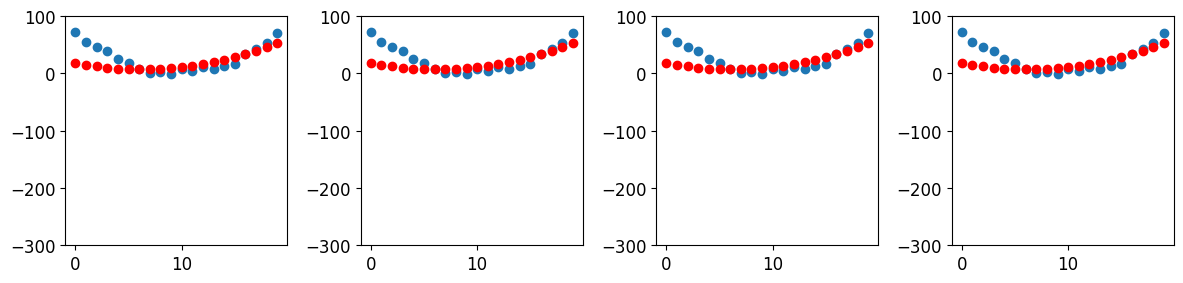

In [ ]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

for i in range(100,000): apply_step(params)

params = orig_params.detach().requires_grad_()

_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

the *derivative* of a function tells you how much a change in its parameters will change its result

To summarize, at the beginning, the weights of our model can be random (training *from scratch*) or come from a pretrained model (*transfer learning*). In the first case, the output we will get from our inputs won't have anything to do with what we want, and even in the second case, it's very likely the pretrained model won't be very good at the specific task we are targeting. So the model will need to *learn* better weights.

We begin by comparing the outputs the model gives us with our targets (we have labeled data, so we know what result the model should give) using a *loss function*, which returns a number that we want to make as low as possible by improving our weights. To do this, we take a few data items (such as images) from the training set and feed them to our model. We compare the corresponding targets using our loss function, and the score we get tells us how wrong our predictions were. We then change the weights a little bit to make it slightly better.

To find how to change the weights to make the loss a bit better, we use calculus to calculate the *gradients*. (Actually, we let PyTorch do it for us!) Let's consider an analogy. Imagine you are lost in the mountains with your car parked at the lowest point. To find your way back to it, you might wander in a random direction, but that probably wouldn't help much. Since you know your vehicle is at the lowest point, you would be better off going downhill. By always taking a step in the direction of the steepest downward slope, you should eventually arrive at your destination. We use the magnitude of the gradient (i.e., the steepness of the slope) to tell us how big a step to take; specifically, we multiply the gradient by a number we choose called the *learning rate* to decide on the step size. We then *iterate* until we have reached the lowest point, which will be our parking lot, then we can *stop*.

All of that we just saw can be transposed directly to the MNIST dataset, except for the loss function. Let's now see how we can define a good training objective. 

torch.Size([784])
tensor([1])


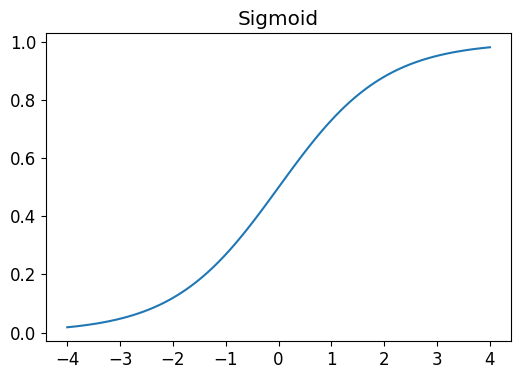

In [18]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape
dset = list(zip(train_x,train_y))
x,y = dset[0]
print(x.shape)
print(y)

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28,1))
bias = init_params(1)

(train_x[0]*weights.T).sum() + bias

def linear1(xb):
    return xb@weights + bias
preds = linear1(train_x)
preds

corrects = (preds>0.0).float() == train_y
corrects

corrects.float().mean().item()


with torch.no_grad():
    weights[0] *= 1.0001

preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])


def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

torch.where(trgts==1, 1-prds, prds)
mnist_loss(prds,trgts)
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

def sigmoid(x):
    return 1/(1+torch.exp(-x))

plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)


In [19]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)
ds = L(enumerate(string.ascii_lowercase))
ds
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28,1))
bias = init_params(1)


dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape
valid_dl = DataLoader(valid_dset, batch_size=256)
batch = train_x[:4]
batch.shape
preds = linear1(batch)
preds
loss = mnist_loss(preds, train_y[:4])
loss
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad


def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad


weights.grad.zero_()
bias.grad.zero_()


def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

(preds>0.0).float() == train_y[:4]


def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

batch_accuracy(linear1(batch), train_y[:4])


def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)


for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8296 0.9145 0.9419 0.9477 0.957 0.9618 0.9643 0.9677 0.9711 0.974 0.9745 0.975 0.9755 0.9755 0.976 0.9765 0.9765 0.977 0.977 0.9784 

In [20]:
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
w.shape,b.shape

class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

opt = BasicOptim(linear_model.parameters(), lr)

def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

validate_epoch(linear_model)


def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

train_model(linear_model, 20)

linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

dls = DataLoaders(dl, valid_dl)
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(10, lr=lr)

0.4932 0.4932 0.6812 0.8711 0.9189 0.937 0.9507 0.9585 0.9638 0.9658 0.9682 0.9692 0.9717 0.9736 0.9751 0.9761 0.977 0.9775 0.9775 0.9785 0.4932 0.7373 0.8618 0.9184 0.9365 0.9502 0.9575 0.9638 0.9663 0.9687 0.9702 0.9721 0.9746 0.9746 0.9761 0.977 0.9775 0.9775 0.9785 0.9785 

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636695,0.502875,0.495584,00:00
1,0.386276,0.264631,0.755152,00:00
2,0.147100,0.157869,0.859666,00:00
3,0.067707,0.099553,0.917566,00:00
4,0.038231,0.074630,0.934740,00:00
5,0.026524,0.060562,0.947988,00:00
6,0.021589,0.051612,0.957802,00:00
7,0.019311,0.045587,0.963199,00:00
8,0.018099,0.041321,0.965653,00:00
9,0.017335,0.038159,0.967615,00:00


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.286991,0.421399,0.504416,00:00
1,0.137267,0.227269,0.803238,00:00
2,0.077219,0.115259,0.917566,00:00
3,0.051537,0.077978,0.940628,00:00
4,0.039519,0.060848,0.955348,00:00
5,0.033296,0.051255,0.963199,00:00
6,0.029667,0.045230,0.964671,00:00
7,0.027281,0.041111,0.966634,00:00
8,0.025550,0.038111,0.967615,00:00
9,0.024206,0.035815,0.970069,00:00


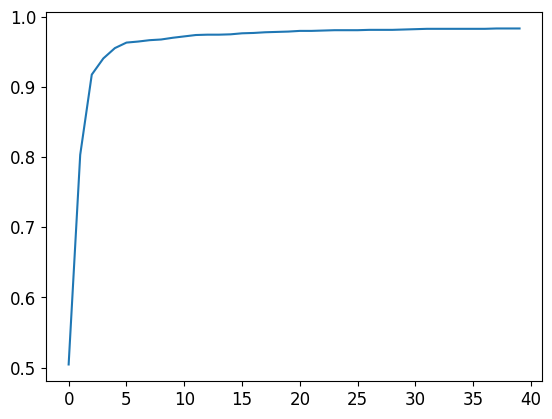

In [22]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)


simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

#hide_output
learn.fit(40, 0.1)

plt.plot(L(learn.recorder.values).itemgot(2));

A neural network is made of parameters (learned numbers) and activations (calculated numbers). These are stored in tensors—multi-dimensional arrays. Tensor rank refers to how many dimensions it has: scalar (0D), vector (1D), matrix (2D).

Networks are built from layers—either linear (like matrix multiplication) or nonlinear (like ReLU). Nonlinearities are also called activation functions. Layers usually alternate between the two.

Key deep learning terms:
```bash
ReLU: zeroes out negative inputs, keeps positives.
Mini-batch: small group of inputs/labels used per step.
Forward pass: run input through the model to get predictions.
Loss: score for how wrong the model is.
Gradient: derivative of loss w.r.t. model parameters.
Backward pass: compute all those gradients.
Gradient descent: update parameters by stepping opposite the gradients.
Learning rate: size of the step in gradient descent.
```

Understanding these terms and watching what your activations and parameters are doing is key to doing deep learning well.